# STARDIST - Nuclear segmentation 

https://github.com/stardist/stardist

https://www.youtube.com/watch?v=Amn_eHRGX5M
Citations:
Uwe Schmidt, Martin Weigert, Coleman Broaddus, and Gene Myers.
Cell Detection with Star-convex Polygons.
International Conference on Medical Image Computing and Computer-Assisted Intervention (MICCAI), Granada, Spain, September 2018.

Martin Weigert, Uwe Schmidt, Robert Haase, Ko Sugawara, and Gene Myers.
Star-convex Polyhedra for 3D Object Detection and Segmentation in Microscopy.
The IEEE Winter Conference on Applications of Computer Vision (WACV), Snowmass Village, Colorado, Marc
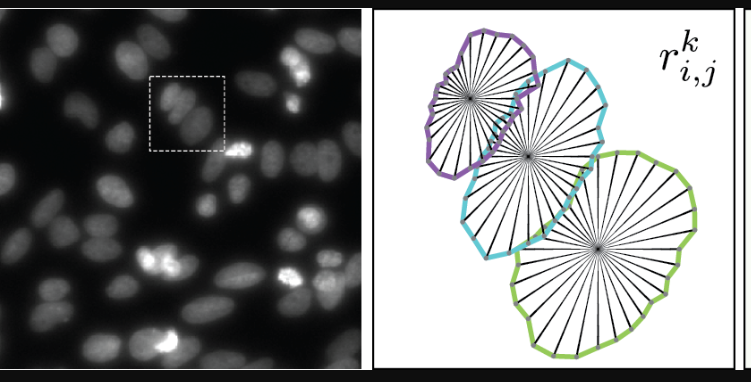
Image source: https://raw.githubusercontent.com/stardist/stardist/master/images/overview_2d.png
h 2020

This notebook was used in a BioPrograma tutorial - https://youtu.be/bloZAGTQPys

In [1]:
#If you want to recreate the same conda environment used in this %notebook
#conda env create -n stardist -f stardist_bruni.yml

In [ ]:
#install packages
!pip install tensorflow
!pip install stardist


In [3]:
from stardist.models import StarDist2D 
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
from skimage.io import imsave, imread


In [ ]:
#set your working directory
os.chdir('../../BioPrograma/000_stardist/') 
print(os.getcwd())

In [5]:
#see all pre-trained models
StarDist2D.from_pretrained() 

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


In [6]:
#load the model you want to use

model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


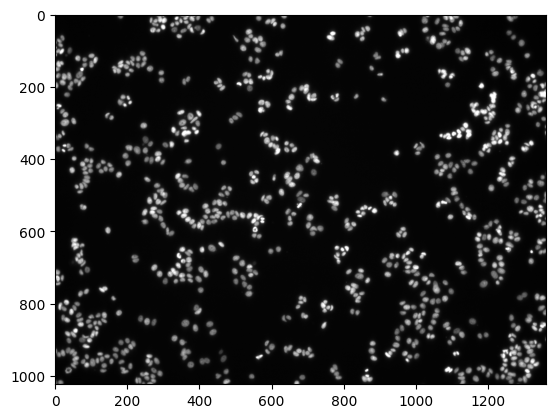

In [7]:
# #open image to inspect. 
# Image from the https://bbbc.broadinstitute.org/BBBC014 dataset 
#If you used the image from the dataset, the recommended citation [Ljosa et al., Nature Methods, 2012] https://www.nature.com/articles/nmeth.2083 Copyright
# Creative Commons License. The SBS Bioimage CNT images are licensed under a Creative Commons Attribution 3.0 Unported License by Ilya Ravki)

img = plt.imread('Channel 2-21-B-09-00.Bmp')
plt.imshow(img, cmap='gray')

In [11]:
#run Stardist

label_image, _ = model.predict_instances(normalize(img))

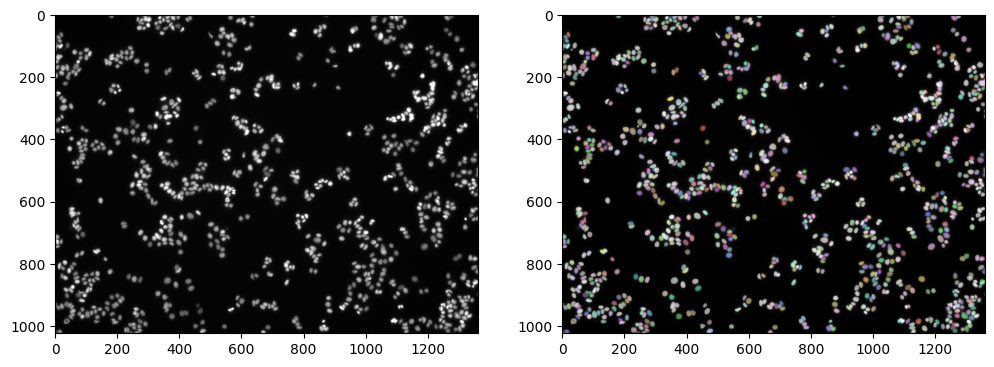

In [12]:
#inspect label and image side by side 
figs, axs = plt.subplots(1,2, figsize=(12,8))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(render_label(label_image, img=img))


(-0.5, 299.5, 299.5, -0.5)

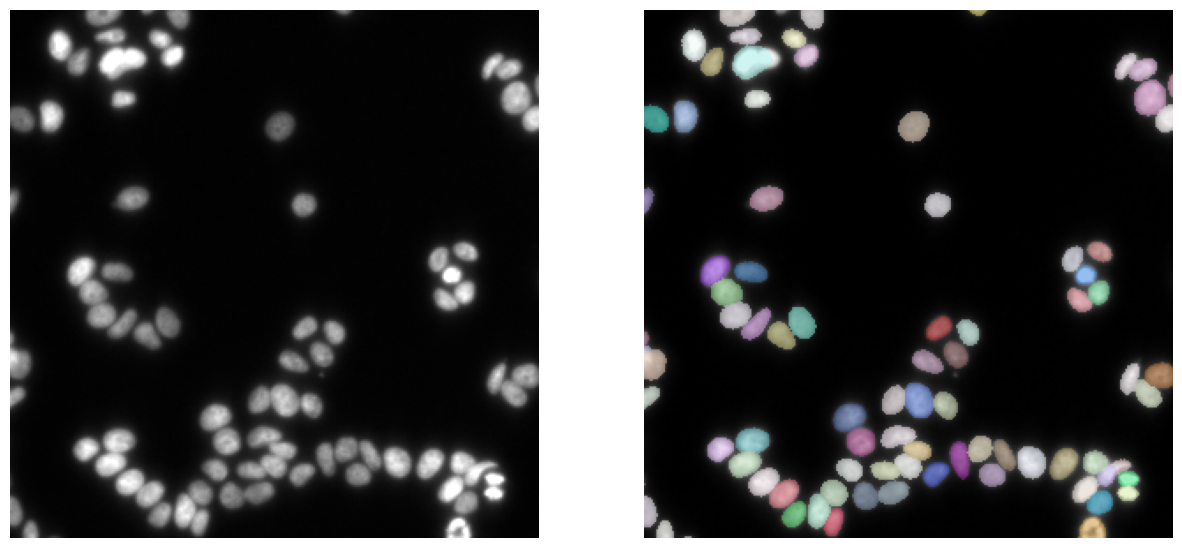

In [13]:
#inspect zoom
figs, axs = plt.subplots(1,2, figsize=(15,10))
axs[0].imshow(img[300:600,300:600], cmap='gray')
axs[0].axis("off")
axs[1].imshow(render_label(label_image[300:600,300:600], img=img[300:600,300:600]))
axs[1].axis("off")


In [15]:
#save label image
imsave('Channel 2-21-B-09-00.tiff', label_image)

3066846639.py (2): Channel 2-21-B-09-00.tiff is a low contrast image


# Automation - all images of interest in a folder

In [ ]:
nucleo_files = np.sort(glob.glob('BBBC014_v1_images/*Channel 2*.Bmp'))

#make folder to sabe label images
!mkdir label_folder
# Define the label_folder
label_folder = 'label_folder/' # replace with your actual folder path

#load the model you want to use
model = StarDist2D.from_pretrained('2D_versatile_fluo')


for i in nucleo_files:
    nucleo_ch1 = imread(i)
    print("Processing image:", i)
    #run Stardist

    label_image, _ = model.predict_instances(normalize(nucleo_ch1))
   
    
    #save label images in a folder
    imsave(os.path.join(label_folder,  f"{os.path.splitext(os.path.basename(i))[0]}.tiff"), label_image)